# Random Forest

# I. Ensemble learning

Decisions trees, although really interesting models, are quite limited. 

Most of the time, they will be outperformed by logistic regression and SVM models.

But decision trees can be used together to bring a better result.


Imagine assigning a set of complex tasks to a group of people: most of the times, the average (or consensus) result will outperform the results of any single person in the group. This is sometimes referred as collective intelligence.

An intuitive way of seeing that is the following experiment:

- Imagine a bot that randomly answers any question right 51 % of the time

Pretty inefficient...

but if we ask that bot the same question:
- 1000 times, you will have a majority of right answers about 75 % of the time
- 10000 times, you will have a majority of right answers about 97 % of the time

> Thanks to the law of large numbers, having a large number of *not so accurate* models can create a powerful model

But the models have to be as independant as possible to be true.

This method can be applied to machine learning models: this is called **ensemble learning**.

Still, some details have to be discussed:
- How to use the vote of each individual (i.e. model) in our ensemble?
- How to ensure the independance of each individual in our ensemble?


## I.1. Voting system

The first thing to define is the voting system in our ensemble.

Imagine we have an ensemble of 3 binary classification models, predicting the following results:

| | Predicted class | Probability |
|:--:|:--:|:--:|
| model 1 | 0 | 0.05 |
| model 2 | 1 | 0.6 |
| model 3 | 1 | 0.55 |

Where:
- the probability is the result of `.predict_proba()`
- the predicted class is `1` if the probability > 0.5, `0` otherwise

There could be many ways to define such a system, but we will talk about two:
- majoritary vote 
- soft vote

### Majoritary vote

This is the majority vote: the class that has the majority of votes is the final prediction.

In our exemple, two models out of three predict class 1, then our ensemble will predict class 1.

### Soft vote

Soft vote takes into account the weights of each individual: instead of taking the majority vote, it averages the probabilities, and makes a prediction based on it.

In our example, the average probability would be:

$$
\text{average proba} = \frac{0.05 + 0.6 + 0.55}{3} = 0.4
$$

Then we would apply the same threshold as for any prediction:
- if average probability > 0.5: predict class 1
- otherwise predict class 0

Thus in our case it would predict class 0 with this vote.

> Soft vote outperforms majoritary vote most of the time, because it takes into account the confidence of the model prediction

# I.2. Bagging

Bagging is contraction of **bootstrap** and **aggregating**.

This is a way of having independant individuals in our ensemble: it allows to have independant models and thus a more powerful ensemble model.

Bootstrap is just random sampling with replacement.

Is other words, we will just randomly select samples in our dataset, *with replacement*. 

With replacement meaning we may draw several times the same sample from the original dataset.

So for example, from an original dataset, we may end up with three, slightly different, subsamples:

<center>
    <img src="images/bootstrap.png" width=800>
</center>

For an ensemble method, on each of those subsamples, we will train a model.

The results of those models will then be aggregated (throught majoritary or soft vote).

<center>
    <img src="images/bagging.png" width=800>
</center>

# II. Random Forests

A random forest is just a bagging of decision trees.

Although this might sounds simple, this is one of the most powerful machine learning models at the moment.

The implementation in scikit-learn, for a classification random forest, is the following:
```python
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
```

You can easily understand most of the hyperparameters:
- `n_estimators` is the number of decision trees to grow
- `criterion` is either `gini` or `entropy`
- `max_depth` is the maximum depth of the trees

And there are some new ones that you might guess:
- `bootstrap`
- `max_samples`
- `max_features`

## II.1. Bootstrapping of samples, boostrapping of features

Up to now, we only spoke about **samples bootstrapping**: we performed random sampling (with replacement) on the samples.

This way, we ended up with **subsamples**.

This is exactly what allows the hyperparameters `bootstrap` and `max_samples`. By default, the values are:
- `bootstrap=True` meaning there is bootstrapping on the samples
- `max_samples=None` meaning our subsamples will have as much samples as the original dataset

But one can also perform **features bootstrapping**: we only select, with replacement, a subset of features for each tree.

We then speak about **subspaces** of the original data.

Scikit-learn allows to do such thing, thanks to the hyperparameter `max_features`:
- if `max_features='auto'`: each subspace will have `sqrt(n_features)`
- if `max_features=3` for example: each subspace will have 3 features

The default value is `'auto'`

## II.2. Out of bag evaluation

Thanks to samples bootstrapping, any tree is trained on a subsample only of the training dataset.

Then samples that are left out are called **out of bag** samples.

Since the decision tree never saw them during training, one can evaluate the tree on those samples: this is called **out of bag evaluation**.

This is implemented in scikit-learn, and can be activated with the hyperparameter `oob_score=True`. Then the score can be retrieved with the attribute `.oob_score_`.

## II.3. More randomness

In order to ensure that all the trees in a random forest are as much independant as possible, one more randomness is added.

Instead of choosing the best feature to split a node (as in a classical decision tree), the algorithm will choose the best feature to split **among a random set of available features**.


Because of that, some trees might not find the optimal split. 

But thanks to that, the trees are more independant, then the forest might be more robust, and less likely to overfit.

To summarize, there are 3 levels of randomness in a random forest:
- In the bagging of the samples
- In the bagging ot the features
- In the feature selection in the split of a node

## III. Implementation example

Let's have an example of use on a toy dataset.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

As usual, we just have to:
- instantiate the model
- train the model on the train dataset
- evaluate the model on the test dataset

In [2]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
print('accuracy:', rf.score(X_test, y_test))

accuracy: 0.9666666666666667


### Interpretability

Finally, we can have a look at the **importance of our features** for interpretation.

Text(0.5, 1.0, 'Features importance')

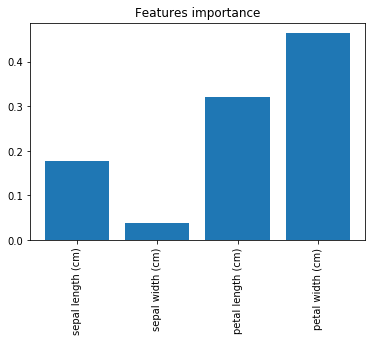

In [3]:
import matplotlib.pyplot as plt
plt.bar(load_iris().feature_names, rf.feature_importances_)
plt.xticks(rotation='vertical')
plt.title('Features importance')